In [1]:
%matplotlib inline

In [2]:
# install dependencies: 
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

1.7.1+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [3]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.7")

In [4]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from cv2 import imshow as cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
DATA_PATH='/home/appuser/data'
AERIAL_PHOTOS=DATA_PATH +'/aerial'
SAMPLE_PHOTO=AERIAL_PHOTOS +'/_20210209191501.jpg'
im = cv2.imread(SAMPLE_PHOTO)

#show image using matplotlib 
img = mpimg.imread(SAMPLE_PHOTO)
print(img)

#show image
cv2_imshow('', im)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


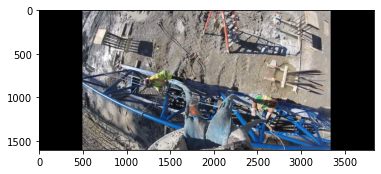

In [7]:
imgplot = plt.imshow(img)

In [8]:
#set up config
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

#initalize predictor w config
predictor = DefaultPredictor(cfg)

outputs = predictor(im)

/tmp is not accessible! Using /var/tmp/iopath_cache instead!
model_final_f10217.pkl: 178MB [00:02, 68.9MB/s]                           
/home/appuser/detectron2/detectron2/modeling/roi_heads/fast_rcnn.py:154: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


In [9]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([8, 0, 8], device='cuda:0')
Boxes(tensor([[ 537.5045,  613.3026, 2966.8188, 1553.7670],
        [2418.6719,  965.5010, 2737.8235, 1337.1292],
        [ 508.3081,  595.7034, 1758.3809, 1576.0409]], device='cuda:0'))


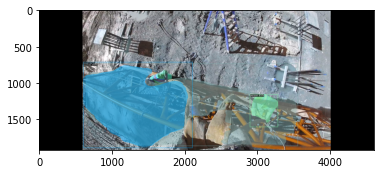

In [10]:
# use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
detections = out.get_image()[:, :, ::-1]
plt.imshow(detections)

In [ ]:
#train on custom dataset (crane/person)
#dataset is in COCO format, following four lines will train and valuate the dataset:
from detectron2.structures import BoxMode
from detectron2.data.datasets import register_coco_instances

register_coco_instances("my_dataset_train", {}, "json_annotation_train.json", "path/to/data")
register_coco_instances("my_dataset_val", {}, "json_annotation_val.json", "path/to/data")
